# **Scenario: Skill Requirement Analysis Using Naive Bayes**<br>

**Problem Statement :**
You are working as a data scientist for an employment platform that wants to improve its job recommendation system. Your task is to analyze the skill requirements mentioned in job descriptions and classify them into predefined categories such as "IT Skills," "Business Skills," "Design Skills," etc. This classification will help job seekers filter jobs based on their skill sets and assist recruiters in finding candidates with the right skills.

**Objective :**
Build a Naive Bayes classifier using scikit-learn in Google Colab to predict the category of skills required for different job roles based on the text of job descriptions.

**Dataset :**
The "Wuzzuf Jobs in Egypt" dataset contains job listings with fields like Title, Company, Location, Type, Level, YearsExp, Country, Skills, and Posted. We'll focus on the Skills column for this project.



# **Installing Required Libraries** <br>
**scikit-learn**: A powerful library for machine learning in Python, providing tools for data preprocessing, model training, and evaluation.

**pandas**: A library for data manipulation and analysis, particularly useful for handling structured data.

**numpy**: A library for numerical computations, providing support for arrays and matrices

**nltk**: For natural language processing tasks, such as stopwords removal

In [92]:
# Install necessary libraries
!pip install pandas numpy scikit-learn nltk

# **Importing Required Libraries** <br>

**pandas**: Used for loading and manipulating the dataset.

**train_test_split**: A function from scikit-learn used to split the dataset into training and testing sets.

**matplotlib and seaborn**: for data visualization

**CountVectorizer**: A tool for converting text data into numerical features (bag-of-words representation).

**MultinomialNB**: A Naive Bayes classifier suitable for classification with discrete features (e.g., word counts).

**accuracy_score, classification_report, confusion_matrix**: Functions used to evaluate the performance of the model.

**re and string** for text cleaning

**joblib**: for saving the trained model



In [93]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For text processing and model building
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For text cleaning
import re
import string

# For saving the model
import joblib

# Set plot style
sns.set(style='whitegrid')


# **Loading the Dataset** <br>
The dataset is  in CSV format and named 'Wuzzuf Jobs in Egypt'.

1-Display the first few rows of the dataset to inspect its structure.

2-Print out the dataset’s information to understand its structure and data types

3-Check for missing values in the job_skills and job_categories columns, which are crucial for our analysis


In [94]:

data_path = '/content/wuzzuf_jobs.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
print(df.head())

                         title  \
0          Civil Site Engineer   
1              IT Section Head   
2                HR Specialist   
3  Quantity Surveying Engineer   
4       Recruitment Specialist   

                                            company  \
0                                    Eamar Al Delta   
1                                      Itechs Group   
2  Elmallah for Engineering and contracting company   
3  Elmallah for Engineering and contracting company   
4                                      Confidential   

                               location    posting_time           job_type  \
0               New Cairo, Cairo, Egypt  37 minutes ago  Full Time|On-site   
1              Heliopolis, Cairo, Egypt  13 minutes ago  Full Time|On-site   
2                   Maadi, Cairo, Egypt  28 minutes ago  Full Time|On-site   
3                   Maadi, Cairo, Egypt  32 minutes ago  Full Time|On-site   
4  10th of Ramadan City, Sharqia, Egypt  37 minutes ago  Full Time|On-site

In [95]:
print(data.info())
print("Missing job_skills:", data['job_skills'].isnull().sum())
print("Missing job_categories:", data['job_categories'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8367 entries, 0 to 8366
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  8367 non-null   object 
 1   company                8367 non-null   object 
 2   location               8367 non-null   object 
 3   posting_time           8367 non-null   object 
 4   job_type               8367 non-null   object 
 5   job_skills             8367 non-null   object 
 6   job_categories         8367 non-null   object 
 7   job_url                8367 non-null   object 
 8   experience_level       8367 non-null   object 
 9   years_of_experience    8367 non-null   object 
 10  job_description        8269 non-null   object 
 11  job_requirements       8116 non-null   object 
 12  company_location       7330 non-null   object 
 13  company_size           6835 non-null   object 
 14  company_industry       6766 non-null   object 
 15  comp

# **Preprocessing the Data** <br>
 preprocess the data to make it suitable for machine learning:


**Drop missing values**: We remove any rows that do not have values in either job_skills or job_categories.

**Extract primary category**: If the job_categories column contains multiple categories separated by a pipe (|), we extract the primary category (the first one) and store it in a new column called Category

**Visualization:** A bar plot is generated to visualize the distribution of the top 10 job categories to get insights into the most common skill categories in the dataset.




In [96]:
data = data.dropna(subset=['job_skills', 'job_categories'])

# Extract the primary category from job_categories (if categories are pipe-separated)
data['Category'] = data['job_categories'].apply(lambda x: x.split('|')[0].strip() if isinstance(x, str) else x)



<ipython-input-97-a5bf90952b37>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


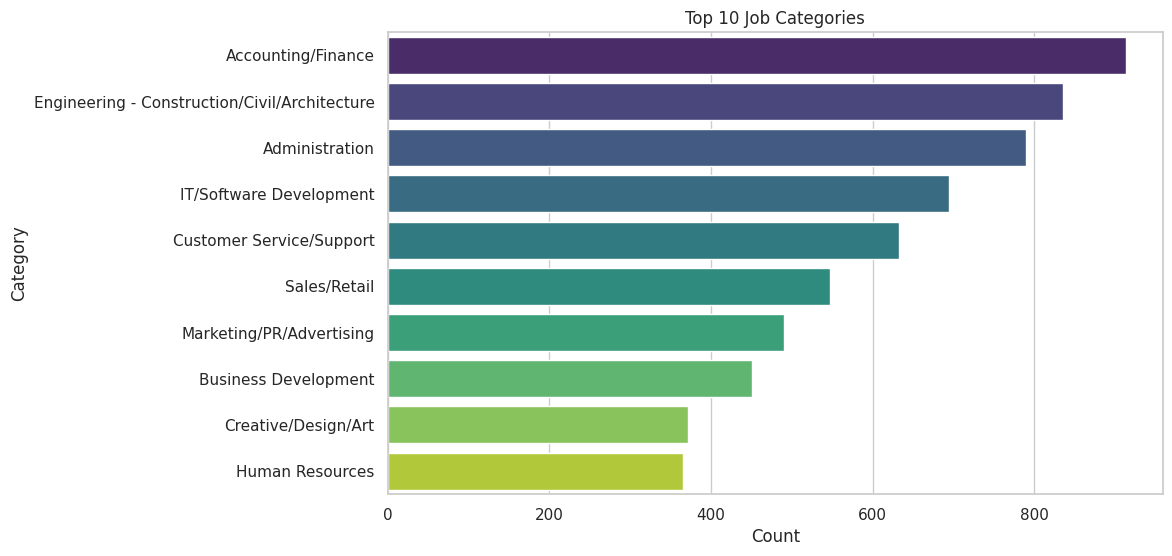

In [97]:
# Visualize the distribution of categories (top 10 for clarity)
plt.figure(figsize=(10, 6))
top_categories = data['Category'].value_counts().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Job Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


**Setting Up NLTK for Text Processing**
by the Natural Language Toolkit (NLTK) for text processing by:

1-Downloading necessary NLTK resources (stopwords and wordnet).

2-Importing the list of English stopwords.

3-Initializing the SnowballStemmer (for stemming) and the WordNetLemmatizer (for lemmatization).

*These tools are essential for cleaning and standardizing the text data in the job skills descriptions.*



In [98]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

# Define a set of English stopwords
stop_words = set(stopwords.words('english'))

# Initialize a stemmer (you can also try a lemmatizer)
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Enhanced Text Cleaning Function**
a custom function enhanced_clean_text to preprocess the job skills text. The function:

1-Splits the text on the pipe (|) character to separate individual skills.

2-Removes extra whitespace and converts the text to lowercase.

3-Removes punctuation and numeric digits.

4-Tokenizes the text and removes stopwords.

Applies stemming (or you can switch to lemmatization if preferred).

Joins the processed tokens back into a cleaned text string

In [99]:
import re
import string

def enhanced_clean_text(text, use_stemming=True):
    """
    Clean the job skills text by:
    1. Splitting on the pipe character to separate individual skills.
    2. Stripping extra whitespace.
    3. Converting to lowercase.
    4. Removing punctuation and digits.
    5. Removing stopwords.
    6. Applying stemming (or lemmatization if desired).
    7. Joining back the processed tokens.
    """
    # Split on '|' and remove extra spaces
    skills = text.split('|')
    text = ' '.join(skill.strip() for skill in skills)

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Tokenize by splitting on whitespace
    tokens = text.split()

    # Remove stopwords and apply stemming or lemmatization
    processed_tokens = []
    for token in tokens:
        if token not in stop_words:
            if use_stemming:
                token = stemmer.stem(token)
            else:
                token = lemmatizer.lemmatize(token)
            processed_tokens.append(token)

    # Join tokens with a space
    return ' '.join(processed_tokens)



data['Category'] = data['job_categories'].apply(lambda x: x.split('|')[0].strip() if isinstance(x, str) else x)

# Apply the enhanced cleaning function to the job_skills column
data['clean_skills'] = data['job_skills'].apply(enhanced_clean_text)

# Optional: View the updated clean_skills column
data[['job_skills', 'clean_skills']].head()



,job_skills,clean_skills
0,AutoCAD|Civil|Civil Engineering|Construction|E...,autocad civil civil engin construct engin site
1,Cisco|IT|Computer Science|Microsoft Office,cisco comput scienc microsoft offic
2,HR Specialist|English|Human Resources|HRIS|HR|...,hr specialist english human resourc hris hr hu...
3,AutoCAD|Civil Engineering|Quantity Surveying|M...,autocad civil engin quantiti survey microsoft ...
4,HR|Human Resources (HR)|Recruitment|SAP|Englis...,hr human resourc hr recruit sap english excel ...



To evaluate the performance of the model, by split the dataset into training and testing sets:

**Training Set (80%)**: Used to train the model.

**Testing Set (20%)**: Used to evaluate the model's performance on unseen data.

*The train_test_split() function is used for this purpose, with random_state=42 ensuring reproducibility of the results*


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define feature and target
X = data['clean_skills']
y = data['Category']

# Split data (80/20), stratify to preserve category proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 6693
Testing samples: 1674


# **Training the Naive Bayes Model** <br>


**Pipeline Creation:**
A scikit-learn Pipeline is created that sequentially:

1-Converts text data into a bag-of-words representation using CountVectorizer.

2-Transforms the counts into TF-IDF features using TfidfTransformer.

3-Trains a MultinomialNB Naive Bayes classifier.



In [101]:
nb_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

# Train the model
nb_pipeline.fit(X_train, y_train)
print("Enhanced model training completed.")

Enhanced model training completed.


# **Making Predictions** <br>
After training the model, we use it to make predictions on the test set (X_test_vec). The predict() method returns the predicted labels for the test data, which we store in y_pred

In [102]:
y_pred = nb_pipeline.predict(X_test)


# **Evaluating the Model** <br>
To assess the model's performance, we calculate the following metrics:

**Accuracy:** The proportion of correctly classified instances out of the total instances.

**Classification Report:** Provides precision, recall, F1-score, and support for each class.

**Confusion Matrix:** A matrix showing the actual vs. predicted classifications, helping to visualize the model's performance.

Enhanced Model Accuracy: 0.6207

Enhanced Classification Report:
                                               precision    recall  f1-score   support

                           Accounting/Finance       0.86      0.90      0.88       183
                               Administration       0.54      0.65      0.59       158
                             Analyst/Research       0.00      0.00      0.00         5
                                      Banking       0.00      0.00      0.00         6
                         Business Development       0.71      0.40      0.51        90
                          Creative/Design/Art       0.81      0.64      0.72        75
                     Customer Service/Support       0.59      0.66      0.62       127
                           Education/Teaching       0.76      0.79      0.77        28
Engineering - Construction/Civil/Architecture       0.50      0.91      0.65       167
          Engineering - Mechanical/Electrical       0.37      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


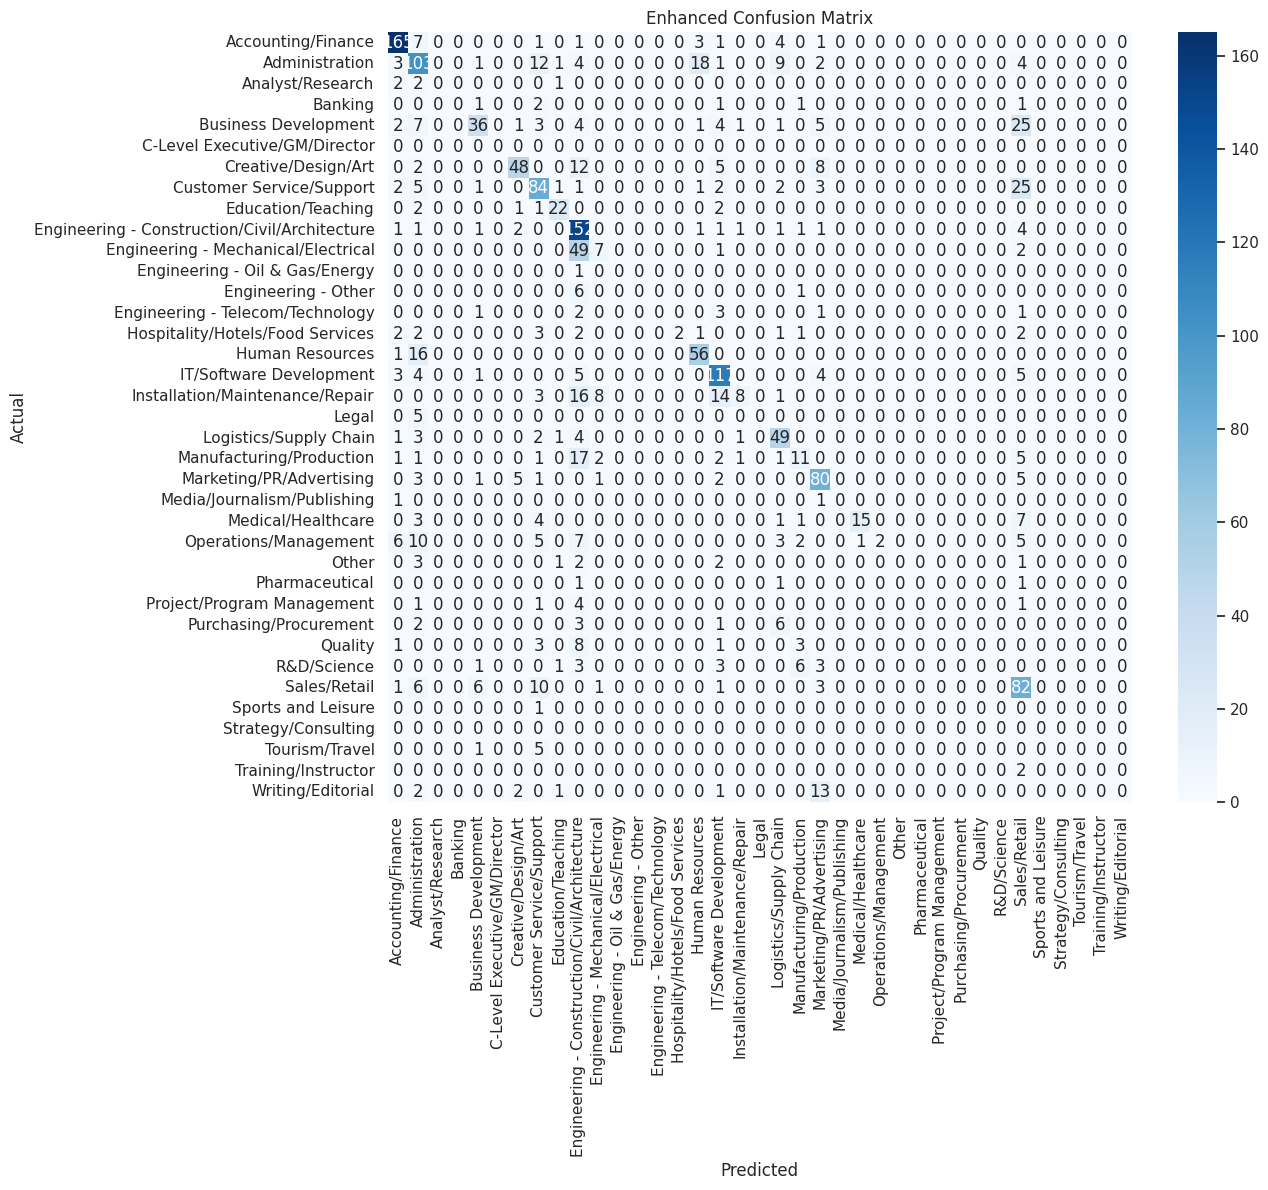

In [103]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Enhanced Model Accuracy: {accuracy:.4f}\n")

print("Enhanced Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=nb_pipeline.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_pipeline.classes_, yticklabels=nb_pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Enhanced Confusion Matrix')
plt.show()


# **Predicting Categories for New Samples** <br>
Test the trained model on new, unseen comments to demonstrate its practical application:

**New Samples**: A list of example job skills descriptions is defined.

**Cleaning**: The same cleaning function is applied to the new samples

**Prediction**: The pipeline predicts the job category for each cleaned sample.

**Results Display**: Each sample is printed alongside its predicted category.

In [104]:
# Example job skills descriptions for prediction
new_samples = [
    "proficient in java, c++, and python programming",
    "experienced in market research, financial analysis, and strategic planning",
    "skilled in graphic design, photoshop, and user interface design"
]

# Clean the new samples using the same cleaning function
new_samples_clean = [clean_text(sample) for sample in new_samples]

# Predict the category for each new sample
predictions = nb_pipeline.predict(new_samples_clean)

# Display the results
for sample, prediction in zip(new_samples, predictions):
    print(f"Job Skills: {sample}\nPredicted Category: {prediction}\n")


Job Skills: proficient in java, c++, and python programming
Predicted Category: IT/Software Development

Job Skills: experienced in market research, financial analysis, and strategic planning
Predicted Category: Marketing/PR/Advertising

Job Skills: skilled in graphic design, photoshop, and user interface design
Predicted Category: Creative/Design/Art

